<a href="https://colab.research.google.com/github/JuanCReyes1/Neurocomputing/blob/master/NeurocomputingIzhikevichNeurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differential Equations and Numerical Integration

## Juan C. Reyes
## Jan 26. 2020
## Neurocomputing & Theoretical Neuroscience 
## Dalhousie University 


### Due: Wednesday Jan 29, 2020, 11:30am


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Modelling Synaptic Responses

## The Alpha Function:

Text(0, 0.5, 'v')

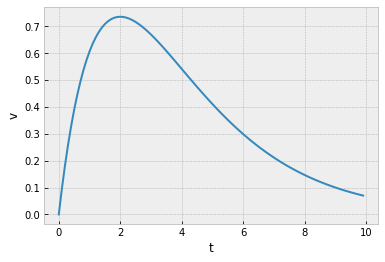

In [0]:
from pylab import *
t = arange(0,10,0.1) 
v = t * exp(-t/2)
plot(t,v)
xlabel("t") ; ylabel("v")

## The EPSP Program:

### Part One:  Modify the Excitatory Postsynaptic Potentials (EPSPs) program to activate the synapse every 1ms and plot the resulting dendritic voltage

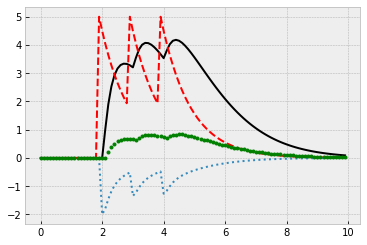

In [0]:
#Synaptic conductance model to simulate an EPSP
from pylab import *
from matplotlib.pyplot import *

#Setting some constants and initial values
c_m=1; E_l=0; E_s=10; tau_s=1; dt=0.1;  
g_l=1; g_s=array([0]); I_l=array([0]); I_s=array([0]); 
v_m=array([0]); t=array([0]);

#Numerical integration using Euler scheme
for i in range(1, int(10/dt)):
   #record the time (in ms) in slot i of vector t 
   t=append(t,t[i-1]+dt)
   #simulate the opening of the synaptic chanels at t=1ms;  
   if abs(mod(t[i],10*dt))<0.0001: g_s[i-1]=1
   #calculate the currents at this time 
   I_l=append(I_l,g_l * (v_m[i-1]-E_l)) #leakage cannel 
   I_s=append(I_s,g_s[i-1] * (v_m[i-1]-E_s)) #transmitter-gated 

   #update differential equations
   g_s=append(g_s,g_s[i-1] - dt/tau_s * g_s[i-1])
   v_m=append(v_m,v_m[i-1] - dt/c_m*(I_l[i-1]+I_s[i-1]))

# Plotting results
plot(t,v_m,'k'); 
plot(t,g_s*5,'r--'); 
plot(t,I_s/5,':');
plot(t,I_l/5,'g.'); 



## Use the Hodgkin Huxley program to plot a response curve of the firing rate (number of spikes / time) for different external currents.


-- recreate fig. 2.11  for varying currents

# The Hodgkin Huxley Program
## Parameters as given in class. I have adjusted the time range to get a better view of the late time evolution of the system. I have also adjusted the time the external current is applied to $t = 25ms$ and the time it is removed to $t=80 ms$.

Our initial external current is set to $I_{ext} =8 mA/cm^{2}$ 

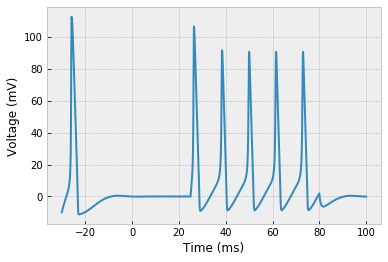

In [0]:
#@title I = 8
# Simulation of Hodgkin-Huxley neuron
from numpy import *
import matplotlib.pyplot as plt



# parameters of the model
# Maximal conductances (in units of mS/cm^2); 0=K, 1=Na, 2=R
g=array([36,120,0.3])
# Battery voltage (in mV); 0=n, 1=m, 2=h
E=array([-12,115,10.613])
# Initialization of some variables
I_ext=0; V=-10; x=array([0,0,1]); 
# Time step for integration
dt=0.01
alpha=zeros(3); beta=zeros(3); gnmh=zeros(3)
x_plot=array([]); y_plot=array([])
current_plot = array([]);


## Integration with Euler method
for t in arange(-30,100,dt):
    if abs(t-25)<dt: I_ext=20 # turns external current on at t=10
    if abs(t-80)<dt: I_ext=0   # turns external current off at t=40
  # alpha functions used by Hodgkin-and Huxley
    alpha[0]=(10-V)/(100*(exp((10-V)/10)-1))
    alpha[1]=(25-V)/(10*(exp((25-V)/10)-1))
    alpha[2]=0.07*exp(-V/20)
  # beta functions used by Hodgkin-and Huxley
    beta[0]=0.125*exp(-V/80)
    beta[1]=4*exp(-V/18)
    beta[2]=1/(exp((30-V)/10)+1)
  # tau_x and x_0 (x=0,1,2) are defined with alpha and beta
    tau=1/(alpha+beta)
    x_0=alpha*tau
  # leaky integration with Euler method
    x=(1-dt/tau)*x+dt/tau*x_0
  # calculate actual conductances g with given n, m, h
    gnmh[0]=g[0]*x[0]**4
    gnmh[1]=g[1]*x[1]**3*x[2]
    gnmh[2]=g[2]
  # Ohm's law
    I=gnmh*(V-E)
  # update voltage of membrane
    V=V+dt*(I_ext-sum(I));
  # record some variables for plotting after equilibration
    #if t>=0:
    #    x_plot=append(x_plot,t)
    #    y_plot=append(y_plot,V) 
    x_plot = append(x_plot,t)
    y_plot = append(y_plot,V)    
    current_plot = append(current_plot,I)   

plt.plot(x_plot,y_plot)  
xlabel('Time (ms)')
ylabel('Voltage (mV)');          

What is important to note from this graph is that for our given value of the external current $I_{ext}$ we are able to induce oscillatory firing of the neuron. A further stability analysis could deduce the onset value at which these constant firing of the axon would be impossible. We pursue a quick numerical estimate by looking at the behaviour of the voltage as we vary several external currents. 


Notice that for our given parameter values and a value of $I_{ext} < 6 $ the HH Neuron will not produce  constant firing .



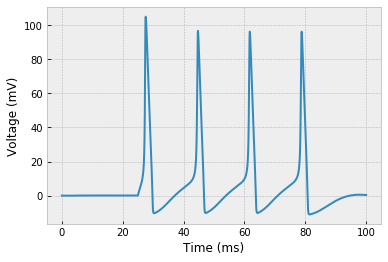

In [0]:
#@title I = 7
# Simulation of Hodgkin-Huxley neuron
from numpy import *
import matplotlib.pyplot as plt



# parameters of the model
# Maximal conductances (in units of mS/cm^2); 0=K, 1=Na, 2=R
g=array([36,120,0.3])
# Battery voltage (in mV); 0=n, 1=m, 2=h
E=array([-12,115,10.613])
# Initialization of some variables
I_ext=0; V=-10; x=array([0,0,1]); 
# Time step for integration
dt=0.01
alpha=zeros(3); beta=zeros(3); gnmh=zeros(3)
x_plot=array([]); y_plot=array([])


## Integration with Euler method
for t in arange(-30,100,dt):
    if abs(t-25)<dt: I_ext=7  # turns external current on at t=10
    if abs(t-80)<dt: I_ext=0   # turns external current off at t=40
  # alpha functions used by Hodgkin-and Huxley
    alpha[0]=(10-V)/(100*(exp((10-V)/10)-1))
    alpha[1]=(25-V)/(10*(exp((25-V)/10)-1))
    alpha[2]=0.07*exp(-V/20)
  # beta functions used by Hodgkin-and Huxley
    beta[0]=0.125*exp(-V/80)
    beta[1]=4*exp(-V/18)
    beta[2]=1/(exp((30-V)/10)+1)
  # tau_x and x_0 (x=0,1,2) are defined with alpha and beta
    tau=1/(alpha+beta)
    x_0=alpha*tau
  # leaky integration with Euler method
    x=(1-dt/tau)*x+dt/tau*x_0
  # calculate actual conductances g with given n, m, h
    gnmh[0]=g[0]*x[0]**4
    gnmh[1]=g[1]*x[1]**3*x[2]
    gnmh[2]=g[2]
  # Ohm's law
    I=gnmh*(V-E)
  # update voltage of membrane
    V=V+dt*(I_ext-sum(I));
  # record some variables for plotting after equilibration
    if t>=0:
        x_plot=append(x_plot,t)
        y_plot=append(y_plot,V)        

plt.plot(x_plot,y_plot)  
xlabel('Time (ms)')
ylabel('Voltage (mV)');        

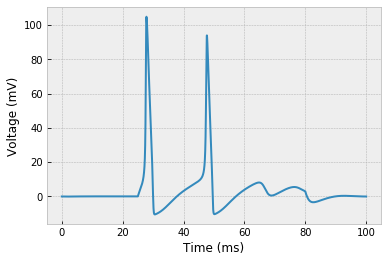

In [0]:
#@title I = 6
# Simulation of Hodgkin-Huxley neuron
from numpy import *
import matplotlib.pyplot as plt



# parameters of the model
# Maximal conductances (in units of mS/cm^2); 0=K, 1=Na, 2=R
g=array([36,120,0.3])
# Battery voltage (in mV); 0=n, 1=m, 2=h
E=array([-12,115,10.613])
# Initialization of some variables
I_ext=0; V=-10; x=array([0,0,1]); 
# Time step for integration
dt=0.01
alpha=zeros(3); beta=zeros(3); gnmh=zeros(3)
x_plot=array([]); y_plot=array([])


## Integration with Euler method
for t in arange(-30,100,dt):
    if abs(t-25)<dt: I_ext=6  # turns external current on at t=10
    if abs(t-80)<dt: I_ext=0   # turns external current off at t=40
  # alpha functions used by Hodgkin-and Huxley
    alpha[0]=(10-V)/(100*(exp((10-V)/10)-1))
    alpha[1]=(25-V)/(10*(exp((25-V)/10)-1))
    alpha[2]=0.07*exp(-V/20)
  # beta functions used by Hodgkin-and Huxley
    beta[0]=0.125*exp(-V/80)
    beta[1]=4*exp(-V/18)
    beta[2]=1/(exp((30-V)/10)+1)
  # tau_x and x_0 (x=0,1,2) are defined with alpha and beta
    tau=1/(alpha+beta)
    x_0=alpha*tau
  # leaky integration with Euler method
    x=(1-dt/tau)*x+dt/tau*x_0
  # calculate actual conductances g with given n, m, h
    gnmh[0]=g[0]*x[0]**4
    gnmh[1]=g[1]*x[1]**3*x[2]
    gnmh[2]=g[2]
  # Ohm's law
    I=gnmh*(V-E)
  # update voltage of membrane
    V=V+dt*(I_ext-sum(I));
  # record some variables for plotting after equilibration
    if t>=0:
        x_plot=append(x_plot,t)
        y_plot=append(y_plot,V)        

plt.plot(x_plot,y_plot)  
xlabel('Time (ms)')
ylabel('Voltage (mV)');            

We now observe that the value of our external current has a very important effect on the dynamics of the system. For an external current value of $I_{ext} = 6 mA/cm^{2}$ we are unable to form sustained firing of the neuron.   

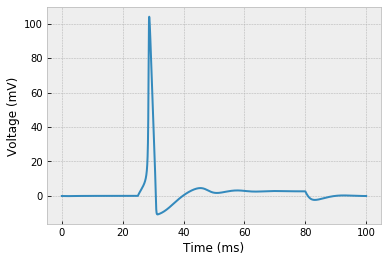

In [0]:
#@title I = 4
# Simulation of Hodgkin-Huxley neuron
from numpy import *
import matplotlib.pyplot as plt



# parameters of the model
# Maximal conductances (in units of mS/cm^2); 0=K, 1=Na, 2=R
g=array([36,120,0.3])
# Battery voltage (in mV); 0=n, 1=m, 2=h
E=array([-12,115,10.613])
# Initialization of some variables
I_ext=0; V=-10; x=array([0,0,1]); 
# Time step for integration
dt=0.01
alpha=zeros(3); beta=zeros(3); gnmh=zeros(3)
x_plot=array([]); y_plot=array([])


## Integration with Euler method
for t in arange(-30,100,dt):
    if abs(t-25)<dt: I_ext=4  # turns external current on at t=10
    if abs(t-80)<dt: I_ext=0   # turns external current off at t=40
  # alpha functions used by Hodgkin-and Huxley
    alpha[0]=(10-V)/(100*(exp((10-V)/10)-1))
    alpha[1]=(25-V)/(10*(exp((25-V)/10)-1))
    alpha[2]=0.07*exp(-V/20)
  # beta functions used by Hodgkin-and Huxley
    beta[0]=0.125*exp(-V/80)
    beta[1]=4*exp(-V/18)
    beta[2]=1/(exp((30-V)/10)+1)
  # tau_x and x_0 (x=0,1,2) are defined with alpha and beta
    tau=1/(alpha+beta)
    x_0=alpha*tau
  # leaky integration with Euler method
    x=(1-dt/tau)*x+dt/tau*x_0
  # calculate actual conductances g with given n, m, h
    gnmh[0]=g[0]*x[0]**4
    gnmh[1]=g[1]*x[1]**3*x[2]
    gnmh[2]=g[2]
  # Ohm's law
    I=gnmh*(V-E)
  # update voltage of membrane
    V=V+dt*(I_ext-sum(I));
  # record some variables for plotting after equilibration
    if t>=0:
        x_plot=append(x_plot,t)
        y_plot=append(y_plot,V)        

plt.plot(x_plot,y_plot)  
xlabel('Time (ms)')
ylabel('Voltage (mV)');            

We now have good motivation for creating a graph of firing frequency vs current, where we expect to see no neuron firing up until we reach the threshold value of $I_{ext} = 6mA/cm^{2}$. 

##  (to complete ): PLOT SEVERAL VOLTAGE VS. TIME GRAPHS FOR VARYING CURRENT VALUES

## ROUGH

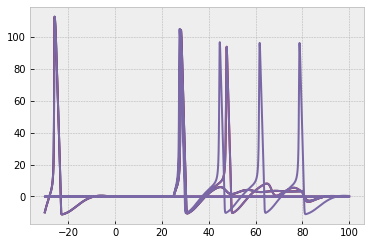

In [0]:
# Simulation of Hodgkin-Huxley neuron
from numpy import *
import matplotlib.pyplot as plt



# parameters of the model
# Maximal conductances (in units of mS/cm^2); 0=K, 1=Na, 2=R
g=array([36,120,0.3])
# Battery voltage (in mV); 0=n, 1=m, 2=h
E=array([-12,115,10.613])
# Initialization of some variables
I_ext=0; V=-10; x=array([0,0,1]); 
# Time step for integration
dt=0.01
alpha=zeros(3); beta=zeros(3); gnmh=zeros(3)
x_plot=array([]); y_plot=array([])
current_plot = array([]);


## Integration with Euler method

#Iterate through different values of current
for J in range(5,8):
  for t in arange(-30,100,dt):
      if abs(t-25)<dt: I_ext=J  # turns external current on at t=10
      if abs(t-80)<dt: I_ext=0   # turns external current off at t=40
    # alpha functions used by Hodgkin-and Huxley
      alpha[0]=(10-V)/(100*(exp((10-V)/10)-1))
      alpha[1]=(25-V)/(10*(exp((25-V)/10)-1))
      alpha[2]=0.07*exp(-V/20)
    # beta functions used by Hodgkin-and Huxley
      beta[0]=0.125*exp(-V/80)
      beta[1]=4*exp(-V/18)
      beta[2]=1/(exp((30-V)/10)+1)
    # tau_x and x_0 (x=0,1,2) are defined with alpha and beta
      tau=1/(alpha+beta)
      x_0=alpha*tau
    # leaky integration with Euler method
      x=(1-dt/tau)*x+dt/tau*x_0
    # calculate actual conductances g with given n, m, h
      gnmh[0]=g[0]*x[0]**4
      gnmh[1]=g[1]*x[1]**3*x[2]
      gnmh[2]=g[2]
    # Ohm's law
      I=gnmh*(V-E)
    # update voltage of membrane
      V=V+dt*(I_ext-sum(I));
    # record some variables for plotting after equilibration
      #if t>=0:
      #    x_plot=append(x_plot,t)
      #    y_plot=append(y_plot,V) 
      x_plot = append(x_plot,t)
      y_plot = append(y_plot,V)    
      current_plot = append(current_plot,I)   

  plt.plot(x_plot,y_plot)            

# (to complete): Create f-I Graph:

# The Hodgkin-Huxley Model:


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

#Constants 
#Neuron Capacitance ( uF/cm^2)
C_m = 1.0
#Conductances (mS/cm^2)
g_Na = 120.0
g_K = 36.0
g_L = 0.3
#Batteries (mV)
V_Na = 50.0
V_K = -77.0
V_L = -54.402

#Define our Alpha and Beta parameters

### M values
def alpha_m(V): 
  return 0.1 * (V + 40.0) / (1.0 - np.exp(-0.1 * (V + 40.0)))

def beta_m(V):
  return 4.0 * np.exp(-0.0556 * (V + 65.0))
### H values
def alpha_h(V):
  return 0.07 * np.exp(-0.05 * (V + 65.0))

def beta_h(V):
  return 1.0 / (1.0 + np.exp(-0.1 * (V + 35.0)))

def alpha_n(V):
  return 0.01 * (V + 55.0) / (1.0 - np.exp(-0.1 * (V + 55.0)))

def beta_n(V):
  return 0.125 * np.exp(-0.0125 * (V + 65))

#Currents

def I_Na(V,m,h):
  return g_Na * np.power(m,3) * h * (V - V_Na)

def I_K(V,n):
  return g_K * np.power(n,4) * (V - V_K)

def I_L(V):
  return g_L * (V - V_L)

#The input Current

def Input_current(t):
  return 10 * (t > 100) - 10 * (t > 200) + 25 * (t > 300)


t = np.arange(0.0, 400.0, 0.1)

#The differential equations

def hodgkin_huxley(X,t):
  V,m,h,n = X
  dVdt = (Input_current(t) - I_Na(V,m,h) - I_K(V,n) - I_L(V)) / (C_m)

  dmdt = alpha_m(V) * (1.0 - m) - beta_m(V) * m
  dhdt = alpha_h(V) * (1.0 - h) - beta_h(V) * h
  dndt = alpha_n(V) * (1.0 - n) - beta_n(V) * n

  return (dVdt, dmdt, dhdt, dndt)

#Initial Conditions

y0 = [-65, 0.05, 0.6, 0.32]
X = odeint(hodgkin_huxley, y0, t)
V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]

ina = I_Na(V,m,h)
ik = I_K(V,n)
il = I_L(V)



# Plotting

<Figure size 432x288 with 0 Axes>

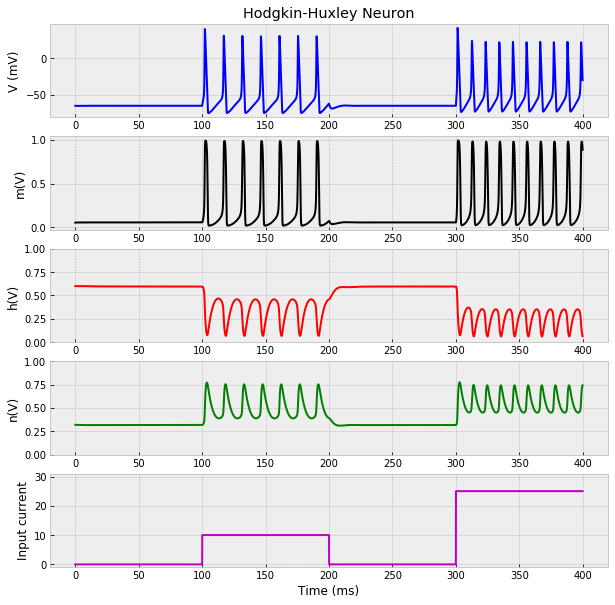

In [0]:
plt.subplots_adjust(hspace = 1)
plt.figure(1)
plt.figure(figsize=(10,10))

plt.subplot(5, 1, 1)
plt.title('Hodgkin-Huxley Neuron')
plt.plot(t, V, 'b')
plt.ylabel('V (mV)')

plt.subplot(5, 1, 2)
plt.plot(t, m, 'k')
plt.ylabel('m(V)')

plt.subplot(5, 1, 3)
plt.plot(t, h, 'r')
plt.ylim(0, 1)
plt.ylabel('h(V)')

plt.subplot(5, 1, 4)
plt.plot(t, n, 'g')
plt.ylim(0, 1)
plt.ylabel('n(V)')

plt.subplot(5, 1, 5)
plt.plot(t, Input_current(t), 'm')
plt.ylabel('Input current')
plt.xlabel('Time (ms)')
plt.ylim(-1, 31)


plt.savefig('./neuron.png')
plt.show()

# Let's visualize this data as an animation

In [0]:

!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

## Voltage vs. Time

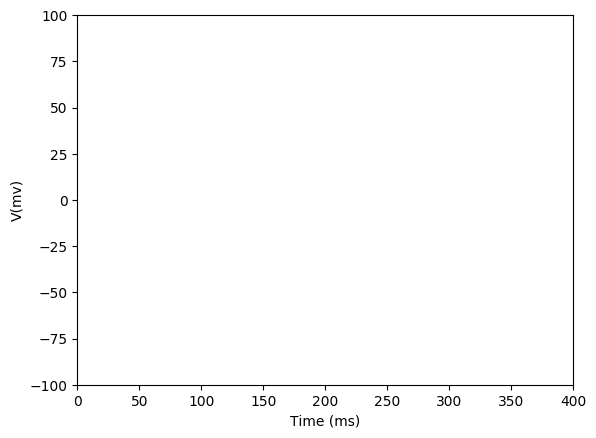

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('default')


fig = plt.figure()
ax = plt.axes(xlim=(0, 400), ylim=(-100, 100))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("V(mv)")
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    line.set_data(t[0:40*(i)],V[0:40*(i)])
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=110, interval=1, blit=False)


anim.save('HHVoltage.gif', writer='imagemagick')

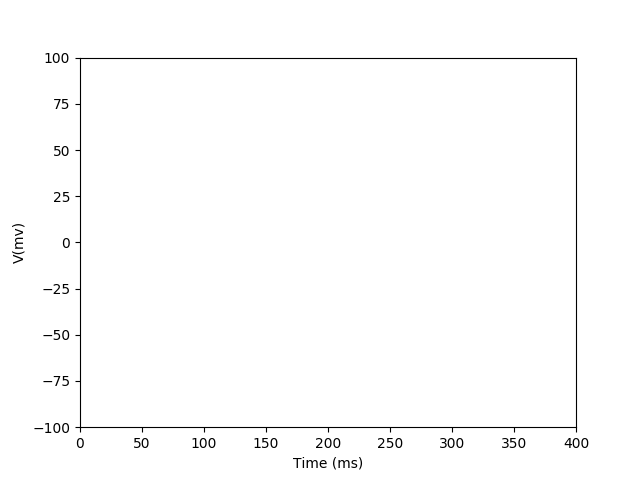

In [0]:
from IPython.display import Image
with open('HHVoltage.gif','rb') as file:
    display(Image(file.read()))

# All dynamic quantities overtime

<Figure size 640x480 with 0 Axes>

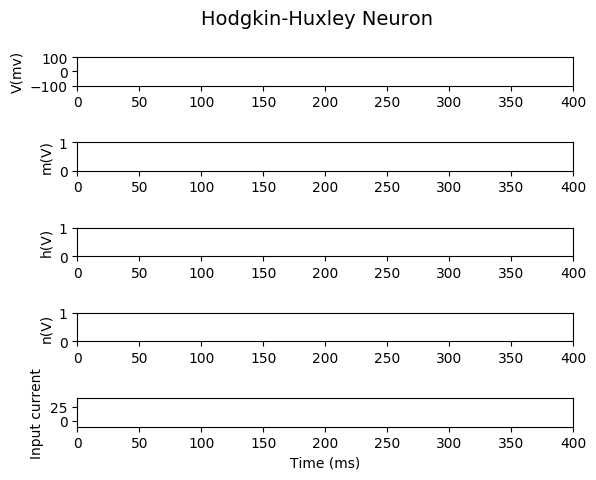

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('default')
plt.subplots_adjust(hspace = 0.1)
#plt.figure(figsize=(20,10))

fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(5)

fig.suptitle('Hodgkin-Huxley Neuron', fontsize=14)


ax1.set_xlim((0,400))


ax2.set_xlim((0,400))


ax3.set_xlim((0,400))


ax4.set_xlim((0,400))


ax5.set_xlim((0,400))
ax5.set_xlabel('Time (ms)')


ax1.set_ylim((-100,100))
ax1.set_ylabel('V(mv)')

ax2.set_ylim((0,1))
ax2.set_ylabel('m(V)')

ax3.set_ylim((0,1))
ax3.set_ylabel('h(V)')

ax4.set_ylim((0,1))
ax4.set_ylabel('n(V)')

ax5.set_ylim((-10,40))
ax5.set_ylabel('Input current')


line=[]

for ax in [ax1,ax2,ax3,ax4,ax5]:
  temp, = ax.plot([], [], lw=1)
  line.append(temp,)

def init():
    for l in line:
      l.set_data([], [])
    return line
def animate(i):
 
    line[0].set_data(t[0:40*(i)],V[0:40*(i)])
    line[1].set_data(t[0:40*(i)],m[0:40*(i)])
    line[2].set_data(t[0:40*(i)],h[0:40*(i)])
    line[3].set_data(t[0:40*(i)],n[0:40*(i)])
    line[4].set_data(t[0:40*(i)],Input_current(t)[0:40*(i)])
    return line

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=110, interval=1, blit=False)
plt.subplots_adjust(hspace=2.0)
plt.show()

anim.save('HHNeuron.gif', writer='imagemagick')
anim.save('HHNeuron.mp4', writer='imagemagick')

Displaying HTML in Colab:

In [0]:
from IPython.display import HTML
from base64 import b64encode
def displayer(s):
  mp4 = open(s,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width=800 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

displayer('HHNeuron.mp4')


As a GIF:

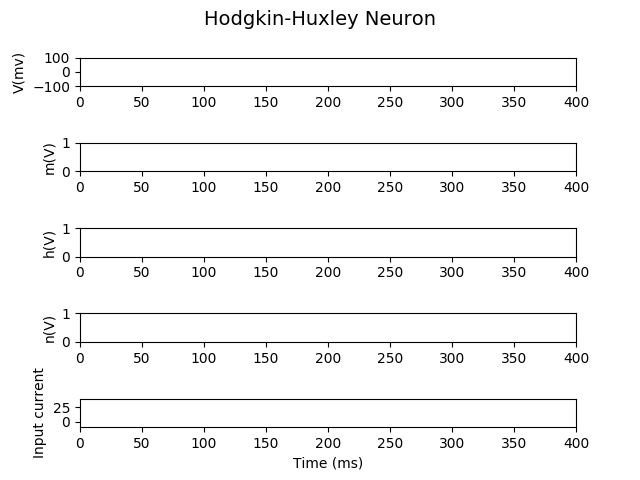

In [0]:
from IPython.display import Image
with open('HHNeuron.gif','rb') as file:
    display(Image(file.read()))

# Integrate and Fire Models:

Begin with a leaky integrator:



The number of peaks for J= 7.0 is 0
The number of peaks for J= 7.1 is 0
The number of peaks for J= 7.199999999999999 is 0
The number of peaks for J= 7.299999999999999 is 0
The number of peaks for J= 7.399999999999999 is 0
The number of peaks for J= 7.499999999999998 is 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The number of peaks for J= 7.599999999999998 is 0
The number of peaks for J= 7.6999999999999975 is 0
The number of peaks for J= 7.799999999999997 is 0
The number of peaks for J= 7.899999999999997 is 0
The number of peaks for J= 7.9999999999999964 is 0
The number of peaks for J= 8.099999999999996 is 0
The number of peaks for J= 8.199999999999996 is 0
The number of peaks for J= 8.299999999999995 is 0
The number of peaks for J= 8.399999999999995 is 0
The number of peaks for J= 8.499999999999995 is 0
The number of peaks for J= 8.599999999999994 is 0
The number of peaks for J= 8.699999999999994 is 0
The number of peaks for J= 8.799999999999994 is 0
The number of peaks for J= 8.899999999999993 is 0
The number of peaks for J= 8.999999999999993 is 0
The number of peaks for J= 9.099999999999993 is 0
The number of peaks for J= 9.199999999999992 is 0
The number of peaks for J= 9.299999999999992 is 0
The number of peaks for J= 9.399999999999991 is 0
The number of peaks for J= 9.499999999999991 is 

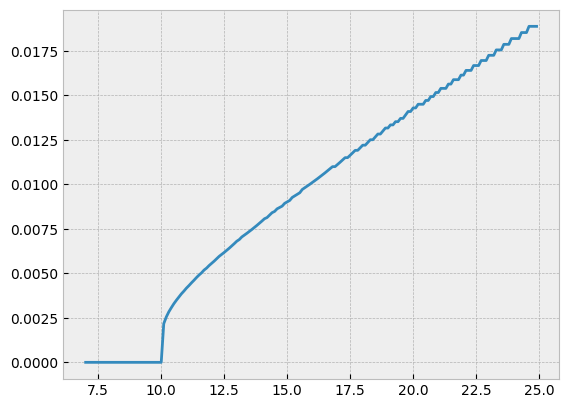

In [48]:
# Simulation of (leaky) integrate-and-fire neuron
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# parameters of the model
dt=0.1       # integration time step [ms]
tau=10       # time constant [ms]
E_L=-65      # resting potential [mV]
theta=-55    # firing threshold [mV]

#####Currents#####
#RI_ext=14   # constant external input [mA/Ohm]
ext_current_range = np.arange(7,25,0.1)

f=[] #list that will store our frequency values

for J in ext_current_range:
    # Integration with Euler method
    v_rec=np.array([])
    t_rec=np.array([])
    s_rec=np.array([])
    t_step=0; 
    v=E_L;
    for t in range(int(100/dt)):
        s=v>theta
        #v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)-RI_ext)) #incorporates the reset 
        v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)- J )) #incorporates the changing current
        #v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)- (J + np.random.uniform(-1,1,1) ))) #incorporates the changing current


        v_rec=np.append(v_rec,v)
        t_rec=np.append(t_rec,t)
        s_rec=np.append(s_rec,s)
        
    peaks_locations = find_peaks(v_rec,-56)
    print("The number of peaks for J= " +str(J) +" is " + str(len(peaks_locations[0])))
    tdiff =[]
    
    #store frequencies for value of J
    for i in range(0,len(peaks_locations[0])-1):
        tdiff.append((peaks_locations[0][i+1]-peaks_locations[0][i]))
    tdiff=np.array(tdiff)
    f.append(1/(tdiff.mean()))
        
f=np.array(f)
f[np.isnan(f)]=0
#f

plt.plot(ext_current_range,f)
    

Let's take a look at incorporating noise into the model: 

In particular in the form:

$\tau_{m} = -v + RI_{ext} + \eta(t)  $



The number of peaks for J= 3.895602851202448 is 0
The number of peaks for J= 6.000515678033138 is 0
The number of peaks for J= 6.740127605959322 is 0
The number of peaks for J= 5.739453922495609 is 0
The number of peaks for J= 5.756801071791546 is 0
The number of peaks for J= 6.387264339377718 is 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The number of peaks for J= 6.4657255622961 is 0
The number of peaks for J= 4.805090436307443 is 0
The number of peaks for J= 6.64431581176945 is 0
The number of peaks for J= 4.375891002692323 is 0
The number of peaks for J= 6.852218415905565 is 0
The number of peaks for J= 6.6797895844557855 is 0
The number of peaks for J= 7.034585858227557 is 0
The number of peaks for J= 7.465801339479004 is 0
The number of peaks for J= 6.881118297190142 is 0
The number of peaks for J= 6.660983808059529 is 0
The number of peaks for J= 6.25849393197609 is 0
The number of peaks for J= 6.269909464285845 is 0
The number of peaks for J= 7.598906221422437 is 0
The number of peaks for J= 8.599452524020741 is 0
The number of peaks for J= 7.724291801800937 is 0
The number of peaks for J= 7.782636192122583 is 0
The number of peaks for J= 7.132581479380441 is 0
The number of peaks for J= 5.90216894071357 is 0
The number of peaks for J= 7.342692970014411 is 0
The number of peaks for J= 5.574270438541969 is 0
The 

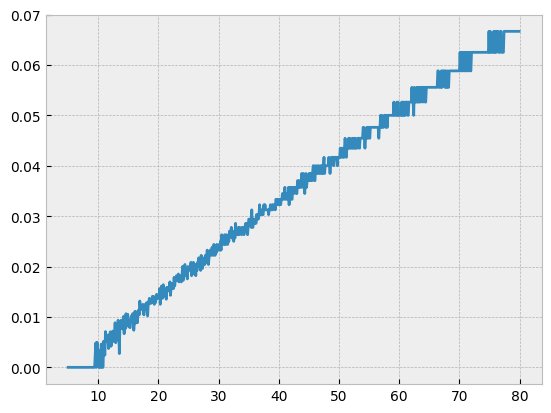

In [49]:
# Simulation of (leaky) integrate-and-fire neuron
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# parameters of the model
dt=0.1       # integration time step [ms]
tau=10       # time constant [ms]
E_L=-65      # resting potential [mV]
theta=-55    # firing threshold [mV]
#RI_ext=14   # constant external input [mA/Ohm]

ext_current_range = np.arange(5,80,0.1)

f=[] #list that will store our frequency values

for J in ext_current_range:
    # Integration with Euler method
    v_rec=np.array([])
    t_rec=np.array([])
    s_rec=np.array([])
    t_step=0; 
    v=E_L;
    r=np.random.normal(0)
    for t in range(int(100/dt)):
        s=v>theta
        #v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)-RI_ext)) #incorporates the reset 
        #v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)- J )) #incorporates the changing current
        v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)- (J + r ))) #incorporates the changing current with gaussian noise


        v_rec=np.append(v_rec,v)
        t_rec=np.append(t_rec,t)
        s_rec=np.append(s_rec,s)
        
    peaks_locations = find_peaks(v_rec,-56)
    print("The number of peaks for J= " +str(J + r ) +" is " + str(len(peaks_locations[0])))
    tdiff =[]
    
    #store frequencies for value of J
    for i in range(0,len(peaks_locations[0])-1):
        tdiff.append((peaks_locations[0][i+1]-peaks_locations[0][i]))
    tdiff=np.array(tdiff)
    f.append(1/(tdiff.mean()))
        
f=np.array(f)
f[np.isnan(f)]=0
#f

plt.plot(ext_current_range,f)

# Now let's take a look at Eugene Izhikevic's model:
*   Random noise can be turned on/off on line 26

Interesting parameter values:


*   Base Model : a=0.02, b=0.2, c=-65, d= 2
*   Fast Spiking: a=0.1, b=0.2, c=-65, d= 2
*   Regular Spiking with Large Reset: a=0.02, b=0.2, c=-65, d= 8
*   Bursting: a=0.01, b=0.2, c=-50, d= 2









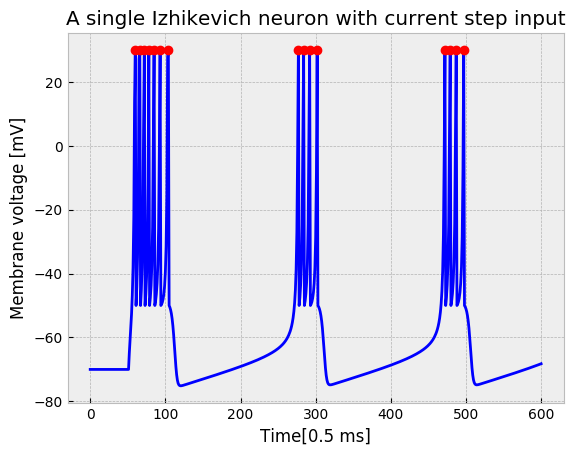

In [66]:
from pylab import *
from matplotlib.pyplot import *
import numpy as np
from scipy.signal import find_peaks

# Initialize parameters
tmax = 300
dt = 0.5

##### Neuron parameters
a = 0.01
b = 0.2
c = -50
d = 2
 
#create random number for external current noise
random = 1*np.random.normal(0)

v = array([-70]) #Resting potential
u = array([-14]) #Steady state
peaks = []
 
# For-loop over time.
for t in arange(int(tmax / dt)):
    l = 0
    #if t*dt > 25 and t*dt < 125: l = 11 + random #incorporates noise with a random number
    if t*dt > 25 and t*dt < 600: l = 10 #without noise
    if v[-1] < 30:
        # Update DOE.
        dv = (0.04*np.power(v[-1],2)) + 5*v[-1] + 140 - u[-1] + l
        v = append(v,v[-1]+(dv*dt))
        du = a*(b*v[-1]-u[-1])
        u = append(u,u[-1] + dt*du)
    else:
        #Spike
        v[-1]=30
        v = append(v,c)
        u = append(u,u[-1] + d)
#peak finder        
peaks_locations = find_peaks(v,20)
peaks.append(peaks_locations[0])

        
        
        
# Plot voltage trace
figure()
plot(v, 'b', label='Voltage trace')

for peak,maxval in zip(peaks_locations[0],peaks_locations[1]["peak_heights"]):
    plot(peak,maxval, 'ro')


xlabel('Time[0.5 ms]')
ylabel('Membrane voltage [mV]')
title('A single Izhikevich neuron with current step input')
show()

## Creating an array of Izhikevich Neurons.

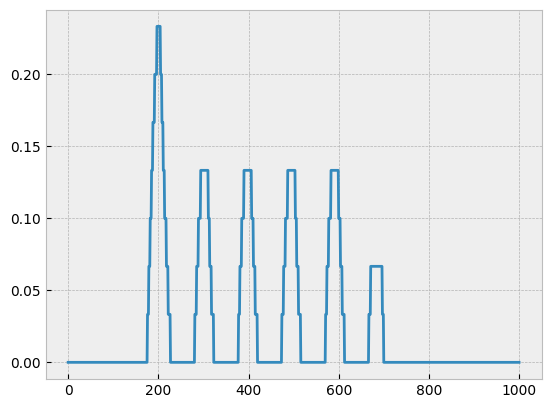

In [62]:
from pylab import *
from matplotlib.pyplot import *
import numpy as np
from scipy.signal import find_peaks


def population(neurons_v,dt,w,t):
  i1=int(t/dt)
  i2=int((t+w)/dt)
  if(i2<=neurons_v.shape[1]):
    N=neurons_v.shape[0]
    nact=0
    for n in range(0,N):
      nact+=len(find_peaks(neurons_v[n,i1:i2+1])[0])
    return (nact/float(N))/float(w) #return the population activity
  else:
    return 0

# Initialize parameters
tmax = 1000
dt = 0.5
trange = tmax/dt

# Neuron parameter
a = 0.01
b = 0.2
c = -50
d = 2
#number of neurons
N=1000
#window size
w=30
#gaussian random number for external current noise
random = np.random.normal(0)

neurons_v=[]
neurons_u=[]
# Reserve memory
for i in range(1,N+1):
    v = array([-70]) #Resting potential
    u = array([-14]) #Steady state

  # For-loop over time.
    for t in arange(int(trange)):
        l = 0
        #if t*dt > 200 and t*dt < 700: l = 10  #The external current without noise
        if t*dt > 200 and t*dt < 700: l = 10 + random  #The external current WITH NOISE
        
        if v[-1] < 35:
            # Update DOE.
            #dv = (0.04*v[-1]+5)*v[-1]+140-u[-1] #given on brightspace
            
            dv = 0.04*np.power(v[-1],2) + 5*v[-1] + 140 - u[-1] #as seen in the text
            
            v = append(v,v[-1]+(dv+l)*dt)
            du = a*(b*v[-1]-u[-1])
            u = append(u,u[-1] + dt*du)
        else:
            #Spike
            v[-1]=35
            v = append(v,c)
            u = append(u,u[-1] + d)

      
    neurons_v.append(v)
    neurons_u.append(u)
    
neurons_v = np.array(neurons_v)
neurons_u = np.array(neurons_u)


pop=[]
for t in arange(0,tmax+1):
  pop.append(population(neurons_v,dt,w,t))

pop=np.array(pop)
plt.plot(arange(0,tmax+1),pop)

For easy plotting:

In [0]:
def plot_window(w):
  pop=[]
  for t in arange(0,tmax+1):
    pop.append(population(neurons_v,dt,w,t))

  pop=np.array(pop)
  plt.style.use('bmh')
  plt.figure(figsize=(15,10))
  plt.title('Population activation function for dt=%d'%w)
  plt.xlabel('time')
  plt.ylabel('A(t)')
  plt.plot(arange(0,tmax+1),pop)
  plt.savefig('./Activation_functiondt=%d.png'%w)

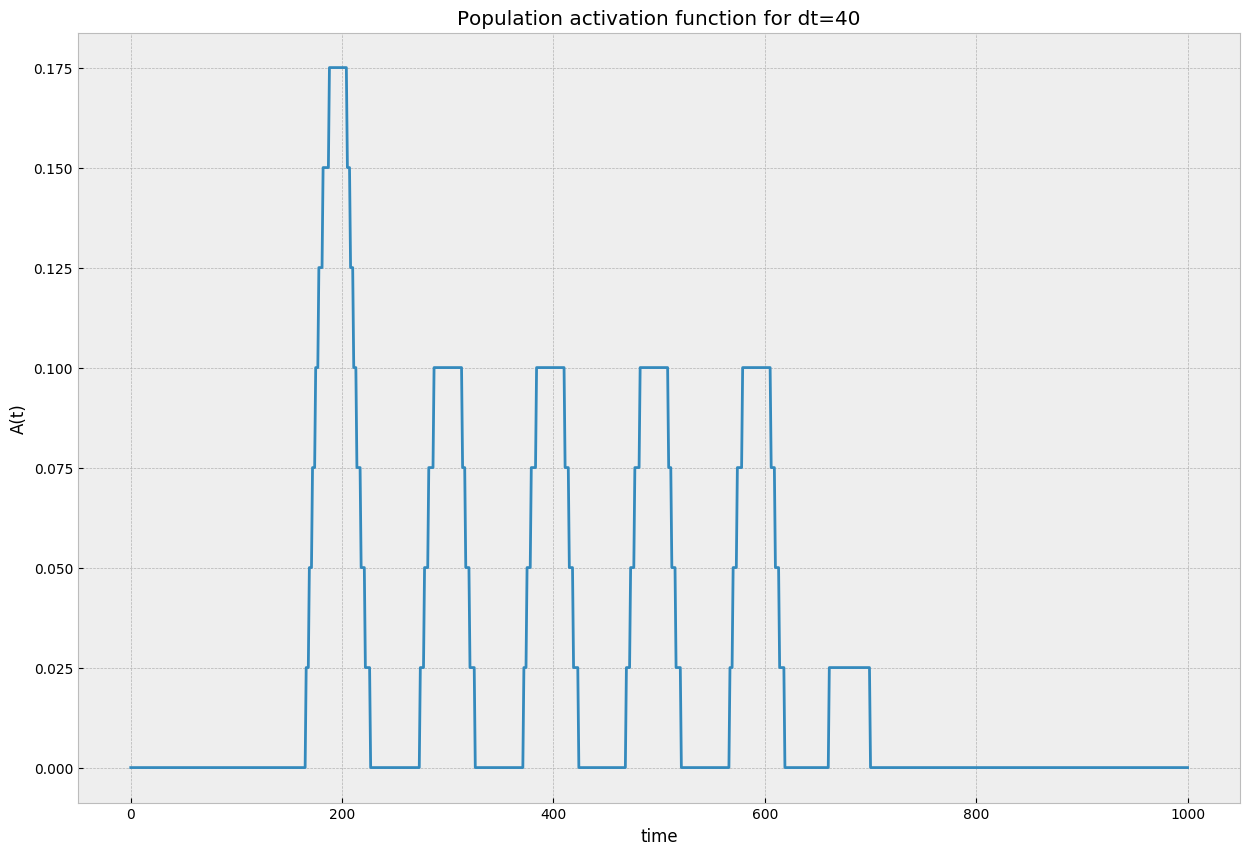

In [0]:
plot_window(40)